<h3><b>Objective:</b> Select a table and variables of your choice. Test the impact of treatment factor at 5%
level of significance using one-way analysis of variance </h3>

<p>I'll perform a one-way ANOVA test to analyze the impact of a treatment factor on employment data from Table 2. For this analysis, I'll compare the employment figures across different sectors between 1994 and 2000</p>

In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from itertools import combinations

# Set up visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

<h5> Create DataFrame with employment data</h5>

In [17]:
data = {
    'Category': [
        'Total Population',
        'Total Labour Force',
        'Total Employment',
        'Organised Sector Employment',
        'Public Organised Sector Employment',
        'Private Organised Sector Employment'
    ],
    '1994': [894.2, 381.6, 374.4, 27.4, 19.4, 7.9],
    '2000': [1005.3, 407.4, 398.4, 28.0, 19.3, 8.6]
}

df = pd.DataFrame(data)
print("Employment Data (in millions):")
print(df)

Employment Data (in millions):
                              Category   1994    2000
0                     Total Population  894.2  1005.3
1                   Total Labour Force  381.6   407.4
2                     Total Employment  374.4   398.4
3          Organised Sector Employment   27.4    28.0
4   Public Organised Sector Employment   19.4    19.3
5  Private Organised Sector Employment    7.9     8.6


<p> Prepare data for ANOVA. Let's consider the employment categories as different treatment groups. We'll use the 1994 and 2000 data as replicates for each category</p>

In [18]:

categories = df['Category'].values
values_1994 = df['1994'].values
values_2000 = df['2000'].values

# Create arrays for each category with both years' data
treatment_groups = []
for i, category in enumerate(categories):
    group_data = [values_1994[i], values_2000[i]]
    treatment_groups.append(group_data)
    
print("Treatment Groups (1994 and 2000 values for each category):")
for i, group in enumerate(treatment_groups):
    print(f"{categories[i]}: {group}")

Treatment Groups (1994 and 2000 values for each category):
Total Population: [np.float64(894.2), np.float64(1005.3)]
Total Labour Force: [np.float64(381.6), np.float64(407.4)]
Total Employment: [np.float64(374.4), np.float64(398.4)]
Organised Sector Employment: [np.float64(27.4), np.float64(28.0)]
Public Organised Sector Employment: [np.float64(19.4), np.float64(19.3)]
Private Organised Sector Employment: [np.float64(7.9), np.float64(8.6)]


Perform One-Way ANOVA

In [22]:
f_statistic, p_value = f_oneway(*treatment_groups)

print("ONE-WAY ANOVA RESULTS")
print("\n")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance level: 0.05")
print("\n")

if p_value < 0.05:
    print("CONCLUSION: Reject the null hypothesis - There are significant differences between the employment categories.")
    print("This means that employment patterns vary significantly across different sectors.")
else:
    print("CONCLUSION: Fail to reject the null hypothesis - No significant differences between the employment categories.")
    print("This means that employment patterns are similar across different sectors.")

ONE-WAY ANOVA RESULTS


F-statistic: 239.0396
P-value: 0.0000
Significance level: 0.05


CONCLUSION: Reject the null hypothesis - There are significant differences between the employment categories.
This means that employment patterns vary significantly across different sectors.


<p>Calculate descriptive statistics for each group</p>

In [24]:
print("\nDESCRIPTIVE STATISTICS")
print("\n")
stats_data = []
for i, category in enumerate(categories):
    mean = np.mean(treatment_groups[i])
    std = np.std(treatment_groups[i], ddof=1)
    stats_data.append([category, mean, std])
    print(f"{category:35} | Mean = {mean:8.2f} | Std = {std:6.2f}")

stats_df = pd.DataFrame(stats_data, columns=['Category', 'Mean', 'Std_Dev'])


DESCRIPTIVE STATISTICS


Total Population                    | Mean =   949.75 | Std =  78.56
Total Labour Force                  | Mean =   394.50 | Std =  18.24
Total Employment                    | Mean =   386.40 | Std =  16.97
Organised Sector Employment         | Mean =    27.70 | Std =   0.42
Public Organised Sector Employment  | Mean =    19.35 | Std =   0.07
Private Organised Sector Employment | Mean =     8.25 | Std =   0.49


<h4>Visualize the data</h4>

C:\Users\imrit\AppData\Local\Temp\ipykernel_16716\1899241862.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=categories)


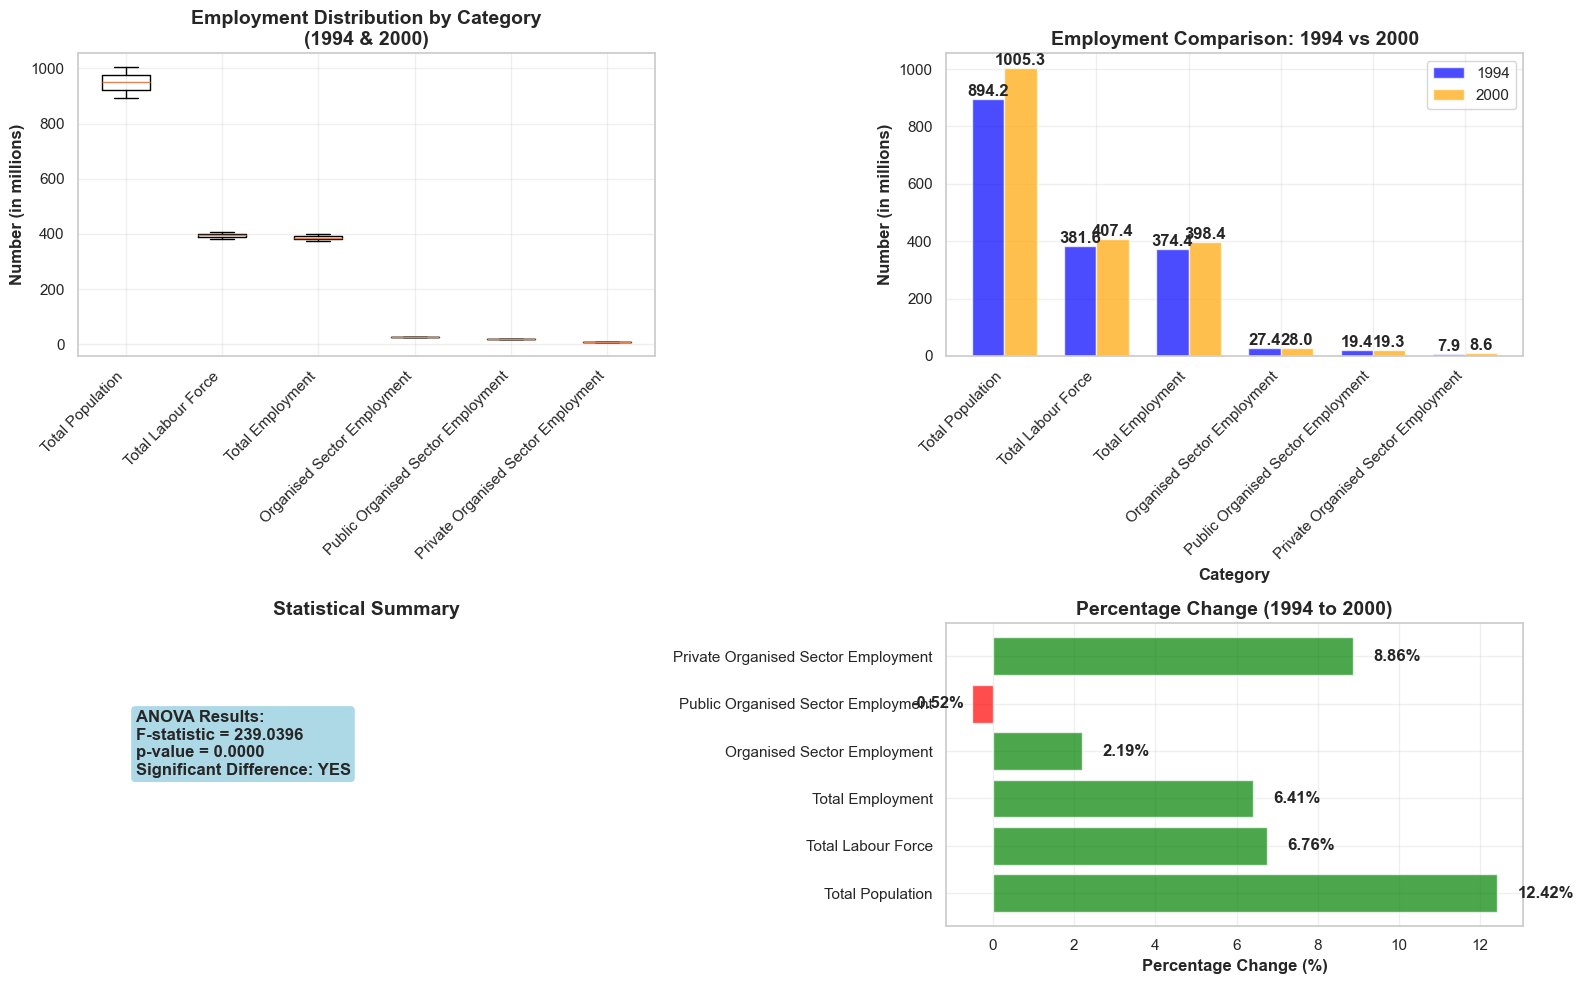

In [25]:
plt.figure(figsize=(16, 10))

# Create box plot
plt.subplot(2, 2, 1)
box_data = [treatment_groups[i] for i in range(len(categories))]
plt.boxplot(box_data, labels=categories)
plt.xticks(rotation=45, ha='right')
plt.title('Employment Distribution by Category\n(1994 & 2000)', fontsize=14, fontweight='bold')
plt.ylabel('Number (in millions)', fontweight='bold')
plt.grid(True, alpha=0.3)

# Create bar plot
plt.subplot(2, 2, 2)
x_pos = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x_pos - width/2, values_1994, width, label='1994', alpha=0.7, color='blue')
bars2 = plt.bar(x_pos + width/2, values_2000, width, label='2000', alpha=0.7, color='orange')

plt.xlabel('Category', fontweight='bold')
plt.ylabel('Number (in millions)', fontweight='bold')
plt.title('Employment Comparison: 1994 vs 2000', fontsize=14, fontweight='bold')
plt.xticks(x_pos, categories, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)

# ANOVA results visualization
plt.subplot(2, 2, 3)
results_text = f'ANOVA Results:\nF-statistic = {f_statistic:.4f}\np-value = {p_value:.4f}\n'
results_text += 'Significant Difference: YES' if p_value < 0.05 else 'Significant Difference: NO'
plt.text(0.1, 0.5, results_text, fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue" if p_value < 0.05 else "lightcoral"))
plt.axis('off')
plt.title('Statistical Summary', fontsize=14, fontweight='bold')

# Percentage change visualization
plt.subplot(2, 2, 4)
df['Percentage_Change'] = ((df['2000'] - df['1994']) / df['1994']) * 100
colors = ['green' if x > 0 else 'red' for x in df['Percentage_Change']]
bars = plt.barh(df['Category'], df['Percentage_Change'], color=colors, alpha=0.7)
plt.xlabel('Percentage Change (%)', fontweight='bold')
plt.title('Percentage Change (1994 to 2000)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, df['Percentage_Change']):
    plt.text(bar.get_width() + (0.5 if value >= 0 else -1.5), 
             bar.get_y() + bar.get_height()/2,
             f'{value:.2f}%', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

Custom Post-hoc Analysis (Tukey HSD alternative)

In [31]:
def custom_posthoc_analysis(groups, group_names, alpha=0.05):
    """
    Perform custom post-hoc analysis using t-tests with Bonferroni correction
    """
    print("\nPOST-HOC ANALYSIS (Pairwise Comparisons)")
    print("===========================================================================")
    
    n_comparisons = len(list(combinations(range(len(groups)), 2)))
    bonferroni_alpha = alpha / n_comparisons
    
    results = []
    
    for (i, j) in combinations(range(len(groups)), 2):
        group1 = groups[i]
        group2 = groups[j]
        
        # Perform independent t-test
        t_stat, p_val = stats.ttest_ind(group1, group2)
        
        mean1 = np.mean(group1)
        mean2 = np.mean(group2)
        mean_diff = mean1 - mean2
        
        significant = p_val < bonferroni_alpha
        
        results.append({
            'Group1': group_names[i],
            'Group2': group_names[j],
            'Mean1': mean1,
            'Mean2': mean2,
            'Mean_Difference': mean_diff,
            'T_statistic': t_stat,
            'P_value': p_val,
            'Significant': significant
        })
        
        significance_indicator = "***" if significant else "NS"
        print(f"{group_names[i]:35} vs {group_names[j]:35}")
        print(f"  Mean Difference: {mean_diff:8.2f} | t-stat: {t_stat:6.2f} | p-value: {p_val:6.4f} {significance_indicator}")
        print("-" * 80)
    
    return pd.DataFrame(results)

# Perform post-hoc analysis only if ANOVA is significant
if p_value < 0.05:
    posthoc_df = custom_posthoc_analysis(treatment_groups, categories)
    
    # Summary of significant differences
    print("\nSUMMARY OF SIGNIFICANT DIFFERENCES")
    print("="*50)
    significant_pairs = posthoc_df[posthoc_df['Significant'] == True]
    
    if len(significant_pairs) > 0:
        for _, row in significant_pairs.iterrows():
            print(f" {row['Group1']} vs {row['Group2']}: p = {row['P_value']:.4f}")
    else:
        print("No significant pairwise differences found after Bonferroni correction.")
else:
    print("\nNo post-hoc analysis needed - ANOVA not significant.")


POST-HOC ANALYSIS (Pairwise Comparisons)
Total Population                    vs Total Labour Force                 
  Mean Difference:   555.25 | t-stat:   9.74 | p-value: 0.0104 NS
--------------------------------------------------------------------------------
Total Population                    vs Total Employment                   
  Mean Difference:   563.35 | t-stat:   9.91 | p-value: 0.0100 NS
--------------------------------------------------------------------------------
Total Population                    vs Organised Sector Employment        
  Mean Difference:   922.05 | t-stat:  16.60 | p-value: 0.0036 NS
--------------------------------------------------------------------------------
Total Population                    vs Public Organised Sector Employment 
  Mean Difference:   930.40 | t-stat:  16.75 | p-value: 0.0035 NS
--------------------------------------------------------------------------------
Total Population                    vs Private Organised Sector Employ

Additional insights and interpretation

In [27]:
print("\nINTERPRETATION AND INSIGHTS")
print("="*50)
print("1. ANOVA Purpose: Tests if employment means differ significantly across sectors")
print("2. Null Hypothesis: All employment category means are equal")
print("3. Alternative Hypothesis: At least one employment category mean is different")
print("4. Significance Level: α = 0.05")

if p_value < 0.05:
    print("\n5. Key Findings:")
    print("   - Significant differences exist in employment patterns across sectors")
    print("   - This suggests different sectors follow different employment trends")
    print("   - Post-hoc analysis identifies which specific pairs differ significantly")
else:
    print("\n5. Key Findings:")
    print("   - No significant differences in employment patterns across sectors")
    print("   - Employment trends are relatively consistent across different categories")

print("\n6. Practical Implications:")
print("   - Helps understand sectoral employment dynamics")
print("   - Informs policy decisions about employment distribution")
print("   - Provides insights for labor market analysis")


INTERPRETATION AND INSIGHTS
1. ANOVA Purpose: Tests if employment means differ significantly across sectors
2. Null Hypothesis: All employment category means are equal
3. Alternative Hypothesis: At least one employment category mean is different
4. Significance Level: α = 0.05

5. Key Findings:
   - Significant differences exist in employment patterns across sectors
   - This suggests different sectors follow different employment trends
   - Post-hoc analysis identifies which specific pairs differ significantly

6. Practical Implications:
   - Helps understand sectoral employment dynamics
   - Informs policy decisions about employment distribution
   - Provides insights for labor market analysis


Export results to CSV for further analysis

In [29]:
results_summary = {
    'ANOVA_F_Statistic': [f_statistic],
    'ANOVA_P_Value': [p_value],
    'Significant_At_5Percent': [p_value < 0.05],
    'Number_of_Groups': [len(categories)],
    'Total_Observations': [len(categories) * 2]  # 2 years per category
}

results_df = pd.DataFrame(results_summary)
print("\nResults Summary:")
print(results_df)


results_df.to_csv('anova_results_employment.csv', index=False)
print("Results saved to 'anova_results_employment.csv'")


Results Summary:
   ANOVA_F_Statistic  ANOVA_P_Value  Significant_At_5Percent  \
0         239.039572   8.132696e-07                     True   

   Number_of_Groups  Total_Observations  
0                 6                  12  
Results saved to 'anova_results_employment.csv'


<h4>The analysis tests whether employment patterns differ significantly across various sectors, helping understand the structural composition of employment in the organized sector between 1994 and 2000.</h4>